In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import livelossplot

In [2]:
!pip install livelossplot


In [7]:
!pip install rise

In [8]:
#Load the MNIST Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

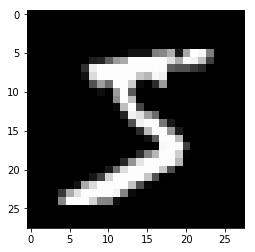

In [11]:
plt.imshow(x_train[0], cmap='gray')

In [19]:
#Prepare Data for CNN
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
x_train = x_train/255  # scaling from 0-1
x_test = x_test/255

In [21]:
#Initialize the Network
from keras.models import Sequential
model = Sequential()

In [22]:
#Add First Convolutional Layer
from keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))


In [23]:
#Add Pooling Layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
#Add Flattening Layer
from keras.layers import Flatten
model.add(Flatten())

In [25]:
#Add a Fully-Connected Layer
#Add Output Layer

from keras.layers import Dense

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

In [26]:
#Build the CNN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
plot_losses = livelossplot.PlotLossesKeras()

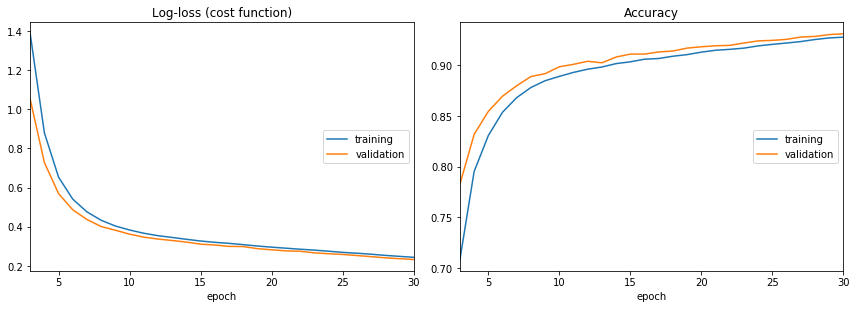

Log-loss (cost function):
training   (min:    0.244, max:    2.283, cur:    0.244)
validation (min:    0.232, max:    2.231, cur:    0.232)

Accuracy:
training   (min:    0.172, max:    0.928, cur:    0.928)
validation (min:    0.346, max:    0.931, cur:    0.931)


In [28]:
model.fit(x_train, y_train,
          batch_size = 1000, # 5, 10 or other number, try!
          callbacks = [plot_losses],
          epochs = 30, # Less epochs - Basic Model
          validation_data = (x_test, y_test)) 
# Look at the loss curves, is the model overfitting? Dropout!!!

In [30]:
#Train the CNN
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0925 - acc: 0.9717
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0834 - acc: 0.9742
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0712 - acc: 0.9776 1s - l
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0656 - acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0611 - acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0573 - acc: 0.9824
Epoch 8/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0527 - acc: 0.9836
Epoch 9/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0497 - acc: 0.9841: 9 - ETA: - ETA: 2s - los - ETA: 1s - loss: 0.0497 -
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0467 - acc: 0.9853


In [31]:
#Test the CNN


loss, accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 598us/step


In [32]:
loss

0.071075787510816

In [33]:
accuracy

0.9788